In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
data = pd.read_csv("train.csv")

print(data.head())
print(data.info())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [45]:
data = data.drop("Loan_ID", axis=1)

In [46]:
for col in ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in ["LoanAmount", "Loan_Amount_Term"]:
    data[col].fillna(data[col].median(), inplace=True)

/tmp/ipython-input-543907405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-543907405.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [47]:
data = pd.get_dummies(data, drop_first=True)

print(data.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True        False         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False         False   
3             1.0         True         True         False         False   
4             1.0         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False              False

In [48]:
X = data.drop("Loan_Status_Y", axis=1)
y = data["Loan_Status_Y"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Shape: (614, 14)
Target Shape: (614,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [53]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8455284552845529

📊 Confusion Matrix:
 [[25 13]
 [ 6 79]]

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.66      0.72        38
        True       0.86      0.93      0.89        85

    accuracy                           0.85       123
   macro avg       0.83      0.79      0.81       123
weighted avg       0.84      0.85      0.84       123



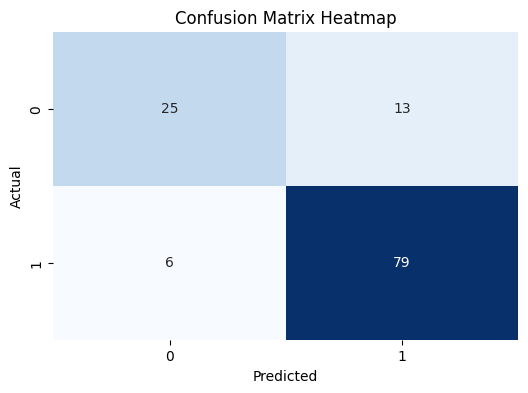

In [54]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

/tmp/ipython-input-2433444052.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="viridis")


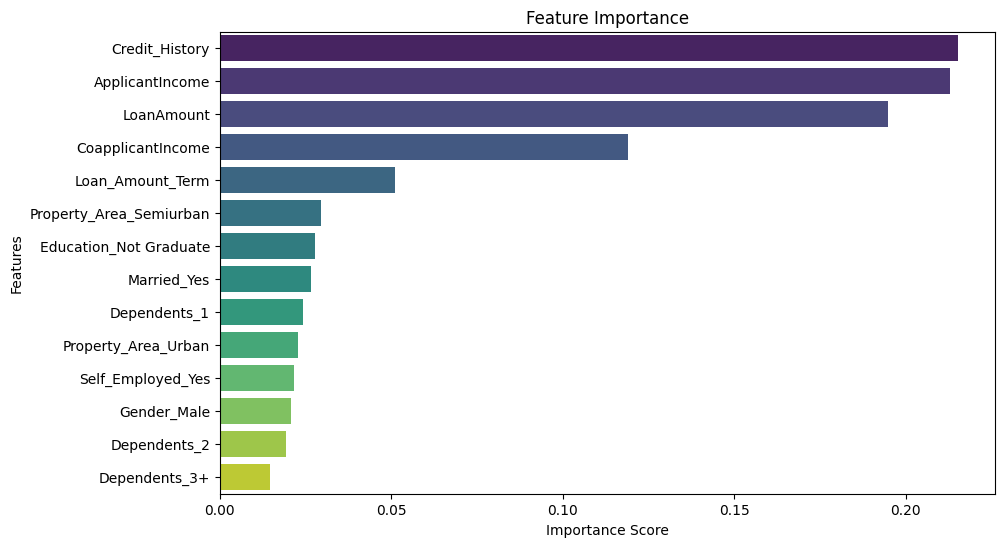

In [55]:
importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()